In [39]:
# import my libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data

data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:

# define features and target

X = data.drop('Class',axis=1)
y = data['Class']

# scale my features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# divide in trai and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# create neural network

# import more libraries for neural network

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# create the nueral network

clas = Sequential()
clas.add(Dense(units=9,kernel_initializer='uniform',activation='relu',input_dim=30))
clas.add(Dropout(rate=0.1))
clas.add(Dense(units=9,kernel_initializer='uniform',activation='relu'))
clas.add(Dropout(rate=0.1))
clas.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
clas.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# train neural netork

clas.fit(X_train,y_train,batch_size=10,epochs=2,verbose=2)

# evalute model

scores = clas.evaluate(X_test,y_test,verbose=0)

# print results

print('Error',scores[0],'\nAccuracy',scores[1])

Epoch 1/2
 - 23s - loss: 0.0111 - acc: 0.9987
Epoch 2/2
 - 21s - loss: 0.0046 - acc: 0.9993
Error 0.003717934984492186 
Accuracy 0.999403110845827


In [41]:
clas.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 9)                 279       
_________________________________________________________________
dropout_7 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_8 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      85290    22    85312
True          26   105      131
__all__    85316   127    85443


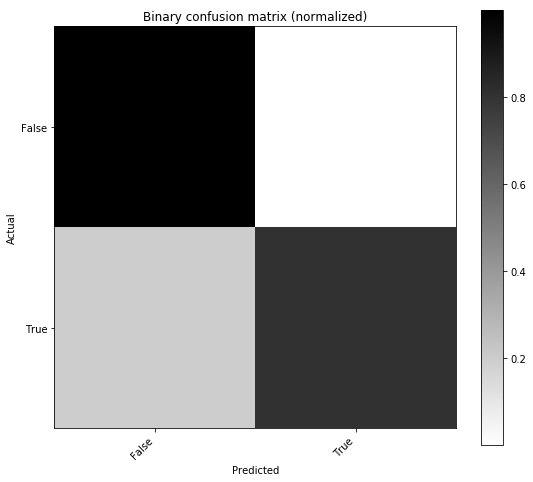

In [36]:
from pandas_ml import ConfusionMatrix
y_predicted = 1 * (clas.predict(X_test) > 0.5)
y_predicted = y_predicted.reshape(len(y_predicted))
y_right = y_test.values.reshape(y_predicted.shape)


confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()

In [37]:
confusion_matrix.print_stats()

population: 85443
P: 131
N: 85312
PositiveTest: 127
NegativeTest: 85316
TP: 105
TN: 85290
FP: 22
FN: 26
TPR: 0.8015267175572519
TNR: 0.9997421230307577
PPV: 0.8267716535433071
NPV: 0.9996952505977776
FPR: 0.0002578769692423106
FDR: 0.1732283464566929
FNR: 0.1984732824427481
ACC: 0.9994382219725431
F1_score: 0.813953488372093
MCC: 0.8137703472512923
informedness: 0.8012688405880097
markedness: 0.8264669041410846
prevalence: 0.001533185866601126
LRP: 3108.174878556558
LRN: 0.1985244773332832
DOR: 15656.381118881118
FOR: 0.0003047494022223264


$$FNR = \frac{FN}{FN+TP}$$

In [50]:
print("False Neegative Rate (Missed Frauds)")
print("\t>>",confusion_matrix.stats()['FNR'])

False Neegative Rate (Missed Frauds)
	>> 0.1984732824427481
